In [1]:
import numpy as np

from dsec import DSEC

import matplotlib.pyplot as plt
import h5py

from plot import plot_flow, create_event_picture

In [3]:
dsec = DSEC(include_backward=False)
print(len(dsec))

8170


In [4]:
dsec.write_flow_ts_cv(0)

In [5]:
for s in range(len(dsec.seq_names)) :
    f_max = 0
    for f in range(dsec.seq_lens[s]) :
        f1 = dsec.prep_item(s, f, 0)
        if( len(f1['events']) > f_max ):
            f_max = len(f1['events'])
    print( f_max )

1513689
2219150
4750978
1488518
4640509
4958127
2702122
2133151
4967662
1898711
2836260
3817380
4055886
4804429
1229661
2678522
1933998
1810905


In [4]:
f1 = dsec.prep_item(1, 0, 0)
ev1 = f1['events']

In [6]:
event_file = h5py.File(dsec.dir / dsec.seqs[0] / "events" / "left" / "events.h5", 'r')

AttributeError: 

In [15]:
locs, cnts, inv = np.unique(ev1[:, :2], return_counts=True, return_inverse=True, axis=0)
print(inv)

[ 34813  79578  45329 ... 138979 146580 148306]


In [21]:
p_sum = np.zeros(len(locs))
np.add.at(p_sum, inv, ev1[:, 3])
t_mean = np.zeros(len(locs))
np.add.at(t_mean, inv, ev1[:, 2])
t_mean /= cnts

In [24]:
evagg = np.concatenate([locs, t_mean[:, np.newaxis].astype(int), p_sum[:, np.newaxis]], axis=1)

In [25]:
print(evagg)

[[  0.   3.  72.   1.]
 [  0.   5.  25.   2.]
 [  0.   8.   7.   1.]
 ...
 [639. 476.  71.  -1.]
 [639. 477.  99.   1.]
 [639. 479.  50.   1.]]


In [27]:
print(p_sum.max())

138.0


In [5]:
uniq, cnts = np.unique(ev1[:, :2], return_counts=True, axis=0)
max_idx = cnts.argmax()
max_val  = cnts[max_idx]
max_loc = uniq[max_idx, :]
print(max_idx, max_val, max_loc)

130461 190 [331. 128.]


In [6]:
print(ev1[(ev1[:, :2] == max_loc).all(axis=1), :])

[[331.    128.      1.393  -1.   ]
 [331.    128.      2.358   1.   ]
 [331.    128.      3.858   1.   ]
 [331.    128.      7.965  -1.   ]
 [331.    128.     11.278   1.   ]
 [331.    128.     12.262   1.   ]
 [331.    128.     12.711   1.   ]
 [331.    128.     13.569   1.   ]
 [331.    128.     17.749  -1.   ]
 [331.    128.     21.16   -1.   ]
 [331.    128.     21.596  -1.   ]
 [331.    128.     22.026  -1.   ]
 [331.    128.     22.75   -1.   ]
 [331.    128.     23.314  -1.   ]
 [331.    128.     24.489   1.   ]
 [331.    128.     27.373  -1.   ]
 [331.    128.     28.026  -1.   ]
 [331.    128.     29.979   1.   ]
 [331.    128.     30.284   1.   ]
 [331.    128.     30.703   1.   ]
 [331.    128.     31.191   1.   ]
 [331.    128.     31.622   1.   ]
 [331.    128.     32.058   1.   ]
 [331.    128.     32.548   1.   ]
 [331.    128.     32.925  -1.   ]
 [331.    128.     33.3     1.   ]
 [331.    128.     33.748   1.   ]
 [331.    128.     34.535   1.   ]
 [331.    128.     3

In [7]:
np.sort(cnts)

array([  1,   1,   1, ..., 182, 182, 190])

In [7]:
# TODO: define threshold
# TODO: count for frames
acc = {}
thrs = 100
for i in range(dsec.get_seq_len(5)) :
    f1 = dsec.prep_item(5, i, 0)
    ev1 = f1['events']

    uniq, cnts = np.unique(ev1[:, :2], return_counts=True, axis=0)

    sel  = cnts > thrs
    loc_sel = uniq[sel]
    for loc in loc_sel :
        if tuple(loc) in acc :
            acc[tuple(loc)] += 1
        else :
            acc[tuple(loc)] = 1

In [ ]:
def filter_locs(locs, thrs_count) :
    pass

In [8]:
print(len(acc))
print(set(acc.values()))
#print(acc)

61359
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50, 51}


In [39]:
print(dsec.len_forw)
print(dsec.len_back)
print(dsec.get_local_idx(0))
print(dsec.get_local_idx(1))
print(dsec.get_flow_dir(dsec.seqs[0], False))

AttributeError: 

In [11]:
def show_frame(dset, idx) :
    if type(idx) is tuple :
        res = dset.prep_item(*idx)
    else :
        res = dset[idx]
    e, c, f= res['events'], res['coords'], res['flows']
    img = create_event_picture(e[e[:, 2] > 75], reversed(dset.res))
    plt.figure(figsize=(20, 20))
    # plt.imshow(img[0::2, 0::2, :])
    plot_flow(img, c, f)
    plt.show()

In [8]:
print(dsec[97]['events'])

[[ 5.160000e+02  3.900000e+02  1.000000e+02  1.000000e+00]
 [ 1.810000e+02  4.050000e+02  1.000000e+02  1.000000e+00]
 [ 7.500000e+01  2.110000e+02  1.000000e+02  1.000000e+00]
 ...
 [ 4.600000e+02  1.830000e+02  9.994507e-04 -1.000000e+00]
 [ 4.040000e+02  1.950000e+02  9.994507e-04 -1.000000e+00]
 [ 5.420000e+02  2.300000e+02  9.994507e-04 -1.000000e+00]]


<Figure size 1440x1440 with 0 Axes>

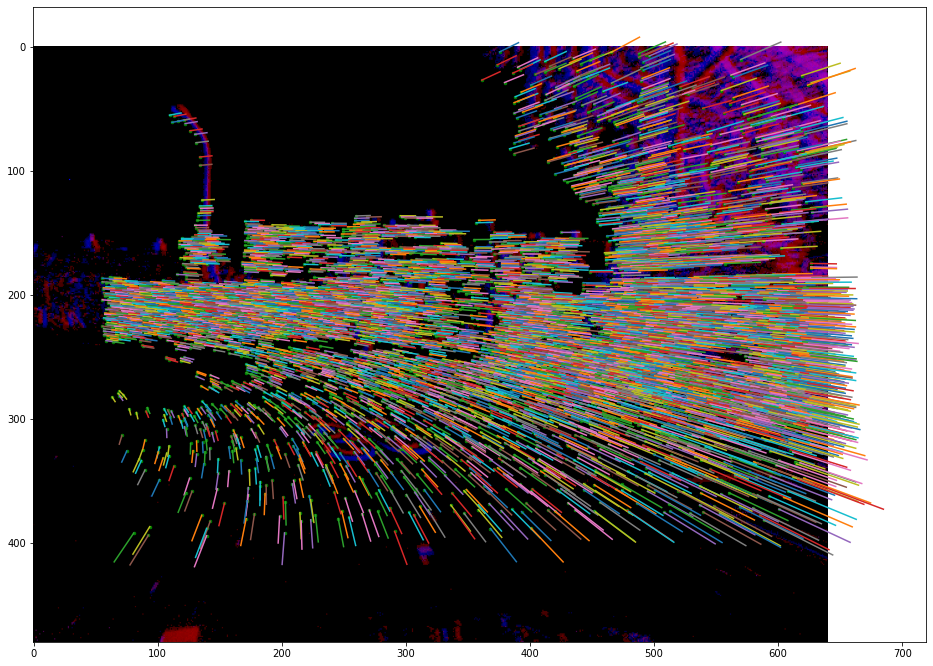

In [14]:
show_frame(dsec, (6, 0, 0))

<Figure size 1440x1440 with 0 Axes>

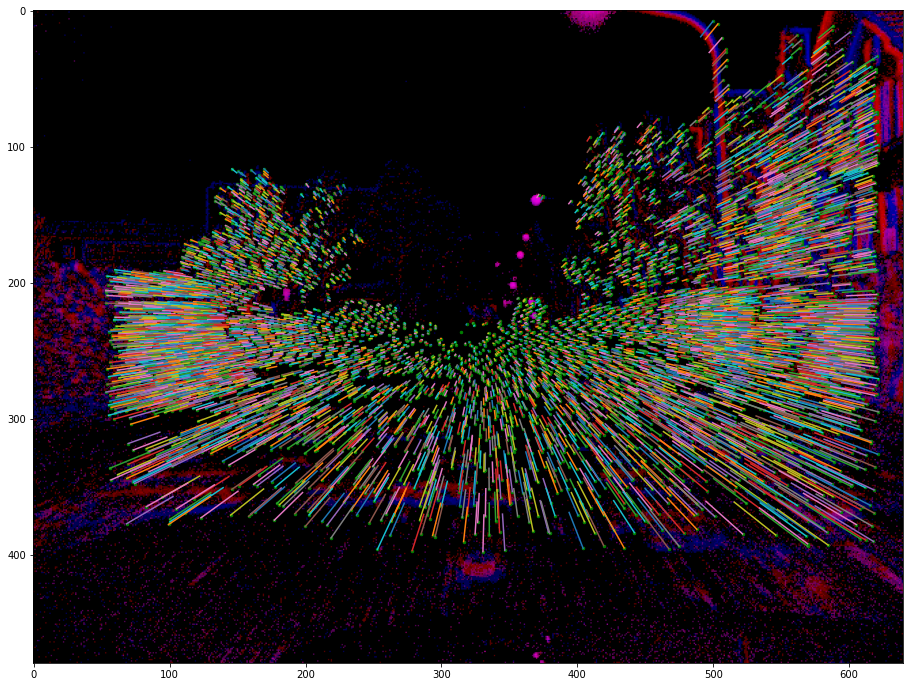

In [7]:
show_frame(dsec, 97)

In [ ]:
event_file = h5py.File(dsec.dir / dsec.seqs[0] / "events" / "left" / "events.h5", 'r')
print(dsec.flow_back_ts[0][:4, :] - event_file['t_offset'])
print(dsec.flow_ts[0][:4, :] - event_file['t_offset'])

In [ ]:
print(dsec.flow_back_ts[0][0, :])
print(dsec.flow_back_ts[0][0, 1] - dsec.flow_back_ts[0][0, 0])

In [ ]:
res = dsec[0]
e, c, f= res['events'], res['coords'], res['flows']
img = create_event_picture(e, (240, 320))
plt.figure(figsize=(20, 20))
# plt.imshow(img[0::2, 0::2, :])
plot_flow(img, c, f)
plt.show()

In [ ]:
dsec_det = DSEC()

In [ ]:
res = dsec_det[0]
e, c, f= res['events'], res['coords'], res['flows']
img = create_event_picture(e, (480, 640))
plt.figure(figsize=(20, 20))
# plt.imshow(img[0::2, 0::2, :])
plot_flow(img, c, f)
plt.show()